In [33]:
#dependences
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import wilcoxon # test for not normally distribution
from scipy.stats import mannwhitneyu, kruskal  # test for not normally distribution

In [2]:

# Define the path to the CSV file
df_csv = "uk_gov_data_sparse_preproc.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(df_csv, encoding="ISO-8859-1")

# Create a copy of the DataFrame
df_1 = df.copy()

# Display the first 4 rows of the DataFrame
df_1.head(30)

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
5,6.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
6,7.0,ABARTH,595,595 1.4 TJET 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
7,8.0,ABARTH,595,595 1.4 TJET 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
8,9.0,ABARTH,595,595 Competizione 180 BHP Hatchback,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,171.0
9,10.0,ABARTH,595,595 Competizione 180 BHP Hatchback,SAT5,Automatic,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,172.0


In [3]:
# Many null values, we need to investigate
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6609 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6755 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6712 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB


In [4]:
# look at missing value
df_1.isnull().sum()

car_id                    0
manufacturer              0
model                     0
description               0
transmission            147
transmission_type         0
engine_size_cm3           1
fuel                      0
powertrain                0
power_ps                 44
co2_emissions_gPERkm      0
dtype: int64

In [5]:
# look at duplcated value
df_1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6751    False
6752    False
6753    False
6754    False
6755    False
Length: 6756, dtype: bool

In [63]:
df_1[df_1.transmission_type=="Electric - Not Applicable"].head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
912,913.0,FIAT,New 500,Action Electric 24kW 95hp,NaN,Electric - Not Applicable,0.0,Electricity,Battery Electric Vehicle (BEV) / Pure Electric...,70.0,0.0
913,914.0,FIAT,New 500,Icon Electric 42kW 118hp,NaN,Electric - Not Applicable,0.0,Electricity,Battery Electric Vehicle (BEV) / Pure Electric...,87.0,0.0
914,915.0,FIAT,New 500,Icon Electric 42kW 118hp,NaN,Electric - Not Applicable,0.0,Electricity,Battery Electric Vehicle (BEV) / Pure Electric...,87.0,0.0
915,916.0,FIAT,New 500,La Prima Electric 42kW 118hp,NaN,Electric - Not Applicable,0.0,Electricity,Battery Electric Vehicle (BEV) / Pure Electric...,87.0,0.0
916,917.0,FIAT,New 500,La Prima Electric 42kW 118hp,NaN,Electric - Not Applicable,0.0,Electricity,Battery Electric Vehicle (BEV) / Pure Electric...,87.0,0.0


In [6]:
df_1.describe()

,car_id,engine_size_cm3,power_ps,co2_emissions_gPERkm
count,6756.000000,6755.000000,6712.000000,6756.000000
mean,3378.500000,1793.553516,185.494636,154.775607
std,1950.433542,825.695652,109.098685,54.972233
min,1.000000,0.000000,0.000000,0.000000
25%,1689.750000,1333.000000,120.000000,131.000000
50%,3378.500000,1749.000000,150.000000,151.000000
75%,5067.250000,1996.000000,218.000000,179.250000
max,6756.000000,6749.000000,800.000000,380.000000


In [7]:
##Question 1: What is the effect of fuel type on CO2 emissions (g/km)?

In [8]:
##Question 2: What is the effect of vehicle power (PS) on CO2 emissions (g/km)?

In [9]:
##Question 3: Are CO2 emissions different depending on the type of vehicle transmission?

In [10]:
## Descriptive data 
transmission_types = df_1['transmission_type'].unique()
transmission_types

array(['Manual', 'Automatic', 'Electric - Not Applicable'], dtype=object)

In [11]:
for transmission in transmission_types:
    data = df_1[df_1['transmission_type'] == transmission]['co2_emissions_gPERkm']
    
    # Test for normality using Shapiro-Wilk test
    stat, p = stats.shapiro(df_1)
    alpha = 0.05
    if p > alpha:
        print(f"CO2 emissions for {transmission} transmission type are normally distributed")
    else:
        print(f"CO2 emissions for {transmission} transmission type are not normally distributed")

CO2 emissions for Manual transmission type are not normally distributed
CO2 emissions for Automatic transmission type are not normally distributed
CO2 emissions for Electric - Not Applicable transmission type are not normally distributed


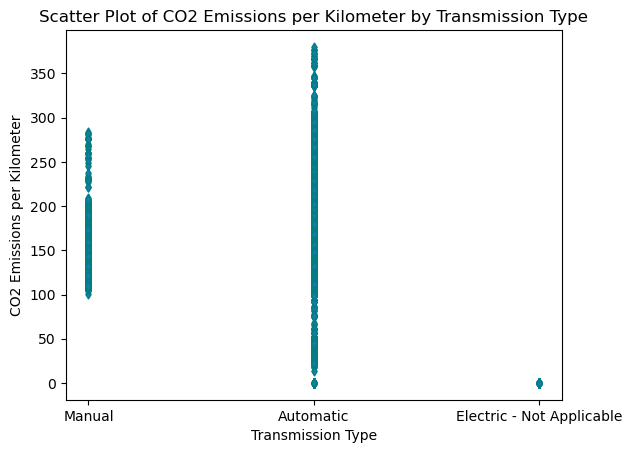

In [12]:
# Create a scatter plot
df_1.plot.scatter(x='transmission_type', y='co2_emissions_gPERkm', marker="d", facecolors="E9C46A", edgecolors="teal")

# Set plot labels and title
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions per Kilometer')
plt.title('Scatter Plot of CO2 Emissions per Kilometer by Transmission Type')

# Display the plot
plt.show()

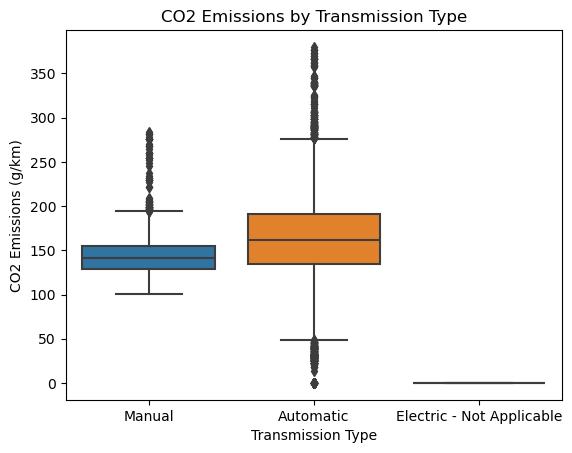

In [13]:
sns.boxplot(x='transmission_type', y='co2_emissions_gPERkm', data=df_1)
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

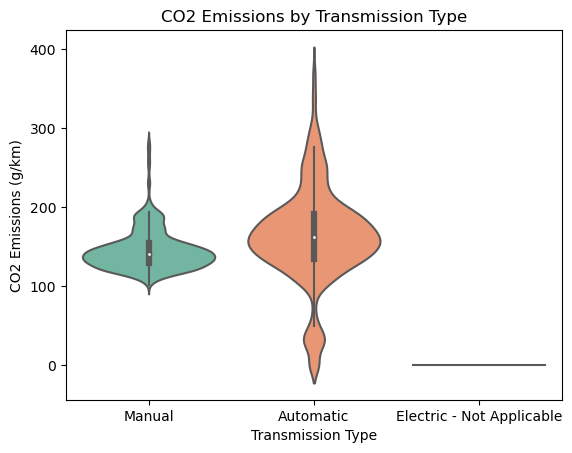

In [53]:
sns.violinplot(x='transmission_type', y='co2_emissions_gPERkm', data=df_1,palette='Set2', scale='width')
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

In [43]:
# Separate data by transmission type
manual = df_1[df_1['transmission_type'] == 'Manual']['co2_emissions_gPERkm']
manual

0       161.0
1       153.0
2       169.0
3       162.0
4       169.0
        ...  
6665    159.0
6670    173.0
6671    159.0
6674    173.0
6675    159.0
Name: co2_emissions_gPERkm, Length: 2291, dtype: float64

In [42]:
automatic = df_1[df_1["transmission_type"] == "Automatic"]['co2_emissions_gPERkm']
automatic

9       172.0
11      172.0
13      172.0
28      177.0
29      162.0
        ...  
6751     76.0
6752     57.0
6753     76.0
6754     57.0
6755     76.0
Name: co2_emissions_gPERkm, Length: 4363, dtype: float64

In [57]:
electric = df_1[df_1["transmission_type"] == "Electric - Not Applicable'"]['co2_emissions_gPERkm']
electric

Series([], Name: co2_emissions_gPERkm, dtype: float64)

In [47]:
manual.mean()

145.73417721518987

In [48]:
automatic.mean()

163.14164565665826

In [58]:
electric.mean()

nan

In [55]:
u_stat, u_p_value = mannwhitneyu(manual, automatic)
print(f'Mann-Whitney U test: U statistic={u_stat}, p-value={u_p_value}')

Mann-Whitney U test: U statistic=3485012.0, p-value=8.625650157963908e-92


In [59]:
# Perform Kruskal-Wallis H test
h_stat, p_value = kruskal(manual, automatic, electric)
print(f'Kruskal-Wallis H test: H statistic={h_stat}, p-value={p_value}')

Kruskal-Wallis H test: H statistic=nan, p-value=nan


In [ ]:
# Kruskal-Wallis H test: Suitable for comparing the distributions of more than two groups.
# A low p-value indicates at least one group distribution is different from the others.
# I have two groups 
#Mann-Whitney U test: Suitable for comparing the distributions of two independent groups. 
#A low p-value (typically < 0.05) indicates a significant difference between the groups.

In [17]:
# Using t-tets
stats.ttest_ind(population1.co2_emissions_gPERkm, population2.co2_emissions_gPERkm, equal_var=False)

TtestResult(statistic=-16.381513747278333, pvalue=4.018991499582667e-59, df=6438.764824163982)

In [ ]:
##Question 4: What is the effect of engine size (cm^3) on CO2 emissions (g/km)?
# William